In [ ]:
import numpy as np
from numpy import sort
import numpy.linalg as LA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
from PIL import Image

: 

To process the data, we define a function `process_data()` that reads the images from the directory and returns the train and test data. The function reads the images from the directory, resizes them to 150x150, converts them to numpy arrays, and appends them to a list. It also appends the target labels to another list. The function then reshapes the image data and splits it into train and test data. It returns the train and test data along with their corresponding labels.

In [ ]:

BASE_DIRECTORY = './faces'


def process_data():
    """
    Process the data and return the train and test data
    """
    image_data = []
    targets = []

    for i, folder in enumerate(os.listdir(BASE_DIRECTORY)):  
        folder_path = os.path.join(BASE_DIRECTORY, folder)   
        for image_file in os.listdir(folder_path):      
            image_path = os.path.join(folder_path, image_file)  
            with Image.open(image_path) as img:
                img = img.resize((150, 150))
                img_array = np.array(img)
                image_data.append(img_array)
                targets.append(i)


    image_data = np.array(image_data)
    targets = np.array(targets)
    modified_data = image_data.reshape(-1, 22500)
    print(modified_data.shape)
    train_data, test_data, train_label, test_label = [], [], [], []

    for person in range(15):
        person_indices = np.where(targets == person)[0] 
        train_indices = person_indices[2:11]
        test_indices = person_indices[:2]
        train_data.extend(modified_data[train_indices])
        train_label.extend(targets[train_indices])
        test_data.extend(modified_data[test_indices])
        test_label.extend(targets[test_indices])

    train_data = np.array(train_data)
    train_label = np.array(train_label)
    test_data = np.array(test_data) 
    test_label = np.array(test_label)
    return train_data, train_label, test_data, test_label 
process_data()

(165, 22500)


(array([[179, 179, 179, ..., 140, 140, 140],
        [179, 179, 179, ..., 117, 118, 122],
        [179, 179, 179, ..., 141, 141, 141],
        ...,
        [179, 179, 179, ..., 132, 143, 144],
        [179, 179, 179, ..., 126, 140, 139],
        [179, 179, 179, ..., 133, 141, 141]], dtype=uint8),
 array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
         9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14]),
 array([[180, 180, 180, ..., 142, 142, 142],
        [179, 179, 179, ..., 140, 140, 140],
      

The PCA function below performs Principal Component Analysis (PCA) on a dataset of images. It defines a function `PCA()` that takes in a data matrix with training data examples as rows and the number of principal components to keep. It then computes the mean face, subtracts the mean face from the data matrix, computes the SVD of the mean-centered data matrix, sorts the eigenvalues from largest to smallest, computes the weights of each data point, and returns the eigenfaces, weights, and mean face.

In [9]:
# def PCA(A, num_components=0):
# 	"""
# 	Principal Component Analysis
# 	input: A, the data matrix with training data examples as rows
# 		   num_components, the number of principal components to keep
# 	"""
# 	[n,d] = A.shape 
# 	if (num_components <= 0) or (num_components>n):
# 		num_components = n
# 	mean_face = A.mean(axis=0)     			# Compute the mean face
# 	A = A - mean_face			    		# Subtract the mean face
# 	eigenfaces, eigenvalues, v = LA.linalg.svd(A.T, full_matrices=False) # Compute the SVD of the mean-centered data matrix
# 	idx = np . argsort ( - eigenvalues )	# Sort the eigenvalues from largest to smallest
# 	eigenfaces = eigenfaces [: , idx ]
# 	weights = np.dot(A, eigenfaces)			# Compute the weights of each data point
# 	return [eigenfaces, weights, mean_face]

In [11]:
def PCA(A, num_components=0):
	"""
	Principal Component Analysis
	input: A, the data matrix with training data examples as rows
		   num_components, the number of principal components to keep
	"""
	A = A.T
	print(A.shape, "a shape in pca")
	[n,d] = A.shape 
	if (num_components <= 0) or (num_components>n):
		num_components = n
	mean_face = A.mean(axis=1)     			# Compute the mean face
	A = A - mean_face[:, np.newaxis]
	L = np.dot(A.T, A)
	print(L.shape, "l shape in pca")			    		# Subtract the mean face
	eigenfaces, eigenvalues, v = LA.linalg.svd(L, full_matrices=False) # Compute the SVD of the mean-centered data matrix
	idx = np.argsort ( - eigenvalues )	# Sort the eigenvalues from largest to smallest
	eigenfaces = eigenfaces [: , idx ]
	weights = np.dot(A, eigenfaces)			# Compute the weights of each data point
	return [eigenfaces, weights, mean_face]



(135, 22500)


In [29]:
def normalize(A, low, high, dtype=None):
    A = np.asarray(A)
    minA, maxA = np.min(A), np.max(A)
    A = A - float(minA)
    A = A / float((maxA - minA))
    A = A * (high - low)
    A = A + low
    if dtype is None:
        return np.asarray(A)
    return np.asarray(A, dtype=dtype)

We use this for ploting of the eigenfaces and to compare the actual and predicted images.

In [30]:
def subplot(title, images, rows, cols, sptitle="subplot", sptitles=[], colormap=cm.gray , ticks_visible=True, filename=None):
	"""
	Plots a list of images in a row.
	Used to plot the results of PCA, ICA and NMF in a row.
	"""
	fig = plt.figure()
	fig.text(.5, .95, title, horizontalalignment='center') 
	for i in range(len(images)):
		ax0 = fig.add_subplot(rows,cols,(i+1))
		plt.setp(ax0.get_xticklabels(), visible=False)
		plt.setp(ax0.get_yticklabels(), visible=False)
		if len(sptitles) == len(images):
			plt.title("%s #%s" % (sptitle, str(sptitles[i])))
		else:
			plt.title("%s #%d" % (sptitle, (i+1)))
		plt.imshow(np.asarray(images[i]).reshape(150, 150), cmap='gray')
	
	plt.show()

Given a face we substarct the mean face from the face and project it to the eigenfaces face space

In [13]:
def project_to_face_space(weights, a, mean_face=None):
	"""
	Project the image vector a into face space
	"""
	# print(weights.shape, a.shape, mean_face.shape)
	return np.dot(weights.T , a - mean_face)

Since the face is projected to face space using `np.dot(a - mean_face, eigen_faces)` we use the counter of this operation to reconstruct the face.

In [14]:
def reconstruct_faces(weights, Q): 
    """
    Reconstruct the image vector a from face space
    """
    return np.dot(weights, Q)

The `TrainEigenFaces` class trians the model by using the training dataset and also perfroms a perdiction given a face by using the Euclidean distance between the face and the projections of all faces.

In [36]:
class TrainEigenFaces:
    def __init__(self, eigenfaces, A=None, labels=None, num_components=0):
        self.num_components = 0
        self.projections = []
        self.threshold = 0
        self.U = eigenfaces
        self.mean_face = []
        if (A is not None) and (labels is not None):
            self.compute(A, labels)
    def distance(self, p, q):
        """
        Euclidean distance between two faces
        """
        p = np.asarray(p).flatten()
        q = np.asarray(q).flatten()
        return np.sqrt(np.sum(np.power((p - q), 2)))
    
    def compute(self, A, labels):
        [eigen_faces, weights, mean_face] = PCA(A)
        self.labels = labels
        self.mean_face = mean_face
        self.U = weights
        # print(self.mean_face.shape)
        self.projections = np.dot(self.U.T, A.T - self.mean_face[:, np.newaxis])
        diffs = self.projections[:, np.newaxis] - self.projections
    
        # Calculate norms for all differences
        norms =  np.linalg.norm(diffs, axis=-1)
    
        # Find the maximum norm
        self.threshold = 0.5 * np.max(norms)
        print("threshold", self.threshold)

    def predict(self, A):
        minDist = np.finfo('float').max
        minClass = -1
        predicted_face = []
        status = ""
        print("A.t shape in perdict", A.T.shape)
        Q = project_to_face_space(self.U, A.T, self.mean_face)
        for i in range(len(self.projections)):
            dist = self.distance(self.projections[i], Q)
            if dist < minDist:
                minDist = dist
                minClass = self.labels[i]
                predicted_face = self.projections[i]
        
        reconsturcted_face = reconstruct_faces(self.U, Q)
        e = LA.norm(np.abs(A.T - self.mean_face - reconsturcted_face))
        if e >= self.threshold:
            status = "Not a face"
            print(status)
        elif e < self.threshold and minDist < self.threshold:
            status = "New face"
            print(status)
        elif e < self.threshold and minDist >= self.threshold:
            status = "Known face"
            print(status)
        
        return minClass, predicted_face, status

(165, 22500)
(22500, 135) a shape in pca
(135, 135) l shape in pca


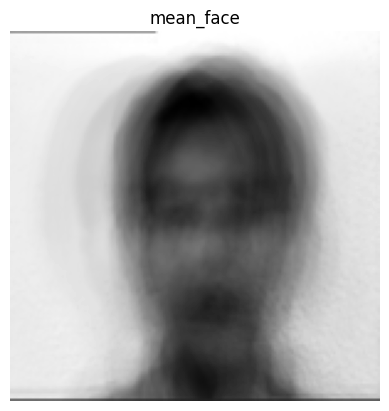

<Figure size 640x480 with 0 Axes>

In [32]:
train_data, train_label, test_data, test_label = process_data()
print(train_data.shape)
[eigenfaces, weights, mean_face] = PCA(train_data)
plt.imshow(mean_face.reshape(150, 150), cmap='gray')
plt.title("mean_face")
plt.axis('off')
plt.show()
E = []
# for i in range(min(len(train_data), 16)):
#     e = eigenfaces[:,i].reshape(train_data[0].shape)
#     E.append(normalize(e,0,255))
# plot them and store the plot to "python_eigenfaces.png"
subplot(title="Eigenfaces Yale Facedatabase", images=E, rows=4, cols=4, sptitle="Eigenface", colormap=cm.jet, filename="python_pca_eigenfaces.png")

We finally train the model and test it with the test image dataset and plot the actual image with its description.

In [37]:
trained_model = TrainEigenFaces(eigenfaces, train_data, train_label)
count = 0
for i in range(len(test_data)):
    print(test_data[i].shape)
    predicted, predicted_face, status = trained_model.predict(test_data[i])
    if predicted == test_label[i]:
        count += 1
print("Accuracy", (count/len(test_data)) * 100)


(22500, 135) a shape in pca
(135, 135) l shape in pca
threshold 2385483929.5003796
(22500,)
A.t shape in perdict (22500,)
Not a face
(22500,)
A.t shape in perdict (22500,)
Not a face
(22500,)
A.t shape in perdict (22500,)
Not a face
(22500,)
A.t shape in perdict (22500,)
Not a face
(22500,)
A.t shape in perdict (22500,)
Not a face
(22500,)
A.t shape in perdict (22500,)
Not a face
(22500,)
A.t shape in perdict (22500,)
Not a face
(22500,)
A.t shape in perdict (22500,)
Not a face
(22500,)
A.t shape in perdict (22500,)
Not a face
(22500,)
A.t shape in perdict (22500,)
Not a face
(22500,)
A.t shape in perdict (22500,)
Not a face
(22500,)
A.t shape in perdict (22500,)
Not a face
(22500,)
A.t shape in perdict (22500,)
Not a face
(22500,)
A.t shape in perdict (22500,)
Not a face
(22500,)
A.t shape in perdict (22500,)
Not a face
(22500,)
A.t shape in perdict (22500,)
Not a face
(22500,)
A.t shape in perdict (22500,)
Not a face
(22500,)
A.t shape in perdict (22500,)
Not a face
(22500,)
A.t shap

We can now plot some images from the test data along with their prediction to see the output.

In [ ]:
for i in range(6):
    predicted, predicted_face, status = trained_model.predict(test_data[i])
    subplot(title="Expected "+str(test_label[i])+" Predicted "+str(predicted) + status, images=[test_data[i], reconstruct_faces(eigenfaces, predicted_face, mean_face)], rows=1, cols=2, sptitle="subject", colormap=cm.gray, filename="python_pca_reconstruction_subject_"+str(i)+".png")

: 

In [39]:
image_data = [] 
with Image.open('image 2 crop.jpg') as img:
                img = img.resize((150, 150))
                img = img.convert('L') 
                img_array = np.array(img)
                image_data = img_array

print(image_data)
          

    
# with Image.open('not_face.jpg') as img:
#                 img = img.resize((150, 150))
#                 img_array = np.array(img)
#                 image_data.append(img_array)
#                 # targets.append(i)
image_data = np.array(image_data)
print(image_data.shape)
modified_data = image_data.reshape(-1, 22500)
print(modified_data.shape)


[[244 244 244 ... 236 236 236]
 [244 244 244 ... 237 237 236]
 [244 244 244 ... 237 237 236]
 ...
 [240 240 240 ... 238 238 238]
 [240 240 240 ... 238 238 238]
 [241 240 240 ... 238 238 238]]
(150, 150)
(1, 22500)


In [38]:
predicted, predicted_face, status = trained_model.predict(modified_data)
print(status)

A.t shape in perdict (22500, 1)


ValueError: operands could not be broadcast together with shapes (135,) (3037500,) 

# Eigen face test

In [1]:
import numpy as np
import cv2
import os
import rembg
from Backend.preprocess import detect_face
from PIL import Image

In [5]:
BASE_DIRECTORY = "AI Students Picture"
def process_data():
    image_data = []
    targets = []
    names = {}

    for i, folder in enumerate(os.listdir(BASE_DIRECTORY)):
        folder_path = os.path.join(BASE_DIRECTORY, folder)
        names[i] = folder
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            print(f"Attempting to open: {image_path}")
            try:
                with Image.open(image_path) as img:
                    print(img)
                    img_array = np.array(img)
                    face = detect_face(img_array)
                    # output_face = rembg.remove(face, bgcolor=(255, 255, 255, 0))
                    output_face = Image.fromarray(output_face)
                    # out_face = output_face.convert('RGB')

                    output_image = output_face.resize((150, 150))
                    output_image = output_image.convert("L")
                    output_array = np.array(output_image)
                   

                    image_data.append(output_array)
                    targets.append(i)
            except Exception as e:
                print(f"Error opening {image_path}: {e}")
    print(image_data)
    image_data = np.array(image_data)
    print(image_data.shape)
    targets = np.array(targets)
    print(names)
    train_data, test_data, train_label, test_label = [], [], [], []

    for person in range(51):
        person_indices = np.where(targets == person)[0]
        train_indices = person_indices[3: 11]
        test_indices = person_indices[:3]
        train_data.extend(image_data[train_indices])
        train_label.extend(targets[train_indices])
        test_data.extend(image_data[test_indices])
        test_label.extend(targets[test_indices])
    
    train_data = np.array(train_data)
    train_label = np.array(train_label)
    test_data = np.array(test_data)
    test_label = np.array(test_label)
    
    return train_data, train_label, test_data, test_label, names

train_data, train_label, test_data, test_label, names = process_data()
print(names)

print("Training Data set", train_data,"\n, Training Labels", train_label)

print("Testing Data set", test_data, "\n, Testing Labels", test_label)


Attempting to open: AI Students Picture\Abdissa Degefu\0.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x28AB8CF9EA0>
Error opening AI Students Picture\Abdissa Degefu\0.jpg: local variable 'output_face' referenced before assignment
Attempting to open: AI Students Picture\Abdissa Degefu\1.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x28AB8CF9F30>
Error opening AI Students Picture\Abdissa Degefu\1.jpg: local variable 'output_face' referenced before assignment
Attempting to open: AI Students Picture\Abdissa Degefu\2.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x28AB8CFA3B0>
Error opening AI Students Picture\Abdissa Degefu\2.jpg: local variable 'output_face' referenced before assignment
Attempting to open: AI Students Picture\Abdissa Degefu\3.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x28AB8CF9DB0>
Error opening AI Students Picture\Abdissa Degefu\3.jpg: local variable 'output_face' refer

In [63]:
def asRowMatrix (X) :
    if len (X) == 0:
        return np . array ([])
    mat = np . empty ((0 , X [0]. size ) , dtype = X [0]. dtype )
    for row in X:
        mat = np . vstack (( mat , np . asarray ( row ). reshape (1 , -1) ))
    return mat

def asColumnMatrix (X):
    if len (X) == 0:
        return np . array ([])
    mat = np . empty (( X [0]. size , 0) , dtype = X [0]. dtype )
    for col in X:
        mat = np . hstack (( mat , np . asarray ( col ). reshape ( -1 ,1) ))
    return mat

In [64]:
def pca (X , y , num_components =0) :
    [n , d] = X . shape
    if ( num_components <= 0) or ( num_components >n) :
        num_components = n
    mu = X. mean ( axis =0)
    X = X - mu
    if n > d:
        C = np . dot (X.T ,X)
        [ eigenvalues , eigenvectors ] = np . linalg . eigh (C)
    else :
        C = np . dot (X ,X .T)
        [ eigenvalues , eigenvectors ] = np . linalg . eigh (C)
        eigenvectors = np . dot (X .T , eigenvectors )
        for i in range (n):
            eigenvectors [: , i ] = eigenvectors [: , i ]/ np . linalg . norm ( eigenvectors [: , i ])
    # or simply perform an economy size decomposition
    # eigenvectors , eigenvalues , variance = np. linalg . svd (X.T, full_matrices = False )
    # sort eigenvectors descending by their eigenvalue
    idx = np . argsort ( - eigenvalues )
    eigenvalues = eigenvalues [ idx ]
    eigenvectors = eigenvectors [: , idx ]
    # select only num_components
    eigenvalues = eigenvalues [0: num_components ]. copy ()
    eigenvectors = eigenvectors [: ,0: num_components ]. copy ()
    return [ eigenvalues , eigenvectors , mu ]


In [65]:
def project (W , X , mu = None ):
    if mu is None :
        return np . dot (X ,W)
    return np . dot (X - mu , W)


In [66]:
def reconstruct (W , Y , mu = None ) :
    if mu is None :
        return np . dot (Y ,W.T)
    return np . dot (Y , W .T) + mu

In [53]:
def normalize (X , low , high , dtype = None ):
    X = np . asarray (X)
    minX , maxX = np . min (X ) , np . max (X)
    # normalize to [0...1].
    X = X - float ( minX )
    X = X / float (( maxX - minX ) )
    # scale to [ low ... high ].
    X = X * ( high - low )
    X = X + low
    if dtype is None :
        return np . asarray (X)
    return np . asarray (X , dtype = dtype )


In [107]:
def compute_threshold(train_data, train_label):
    [ eigenvalues , eigenvectors , mu ] = pca(train_data, train_label)
    # U = np.dot((train_data - mu), eigenvectors)

    projection_face_space = project(eigenvectors, train_data)
    diffs = projection_face_space[:, np.newaxis] - projection_face_space
    
        # Calculate norms for all differences
    norms =  np.linalg.norm(diffs, axis=-1)
    
        # Find the maximum norm
    threshold = 0.5 * np.max(norms)

    return threshold

threshold = compute_threshold(asRowMatrix(train_data), train_label)
# threshold = 1000
print(threshold)


1000


In [131]:
class EigenfacesModel:
    def __init__(self):
        self . num_components = 0
        self . projections = []
        self .W = []
        self . mu = []
    
    def EuclideanDistance(self, P, q):
        P = np . asarray (P). flatten ()
        q = np . asarray (q). flatten ()
        return np . sqrt ( np . sum ( np . power (( P - q) ,2) ))
    
    def CosineDistance(self, p, q):
        p = np . asarray (p). flatten ()
        q = np . asarray (q). flatten ()
        return -np . dot ( p.T ,q ) / ( np . sqrt ( np . dot (p ,p.T )* np . dot (q ,q.T )))
 
    def ManhattanDistance(self, P, Q):
        P = np.asarray(P).flatten()
        Q = np.asarray(Q).flatten()
        return np.sum(np.abs(P - Q))



    def predict ( self , X):
        minDist = np . finfo ('float') . max
        minClass = -1
        Q = project ( self .W , X. reshape (1 , -1) , self . mu )
        for i in range ( len ( self . projections )):
            dist = self . ManhattanDistance ( self . projections [ i], Q)
            if dist < minDist :
                minDist = dist
                minClass = self . y[i]
        reconstruction = reconstruct(self.W, Q, self.mu)
        e = np.linalg.norm(np.abs(((X.reshape(1, -1)) - self.mu.reshape(1, -1)) - reconstruction))
        if e >= threshold:
            print("NOt a face")
        
        elif e < threshold and minDist < threshold:
            print("New face")
        
        elif e < threshold and minDist >= threshold:
            print("Known Face")

        
        
        return minClass
    def compute ( self , X , y):
        [D , self .W , self . mu ] = pca ( asRowMatrix ( X) ,y , self . num_components )
        # store labels
        self .y = y
        # store projections
        for xi in X :
            self . projections . append ( project ( self .W , xi . reshape (1 , -1) , self . mu ))
        
        return [D , self .W , self . mu ]

In [132]:
model = EigenfacesModel()
[D , W , mu ] = model.compute( asRowMatrix (train_data ) , train_label)
correct = 0
total = 0
for i in range (len(test_data)):
    predict = model.predict(test_data[i])
    # get a prediction for the first observation
    if test_label[i] == predict:
        correct += 1
    total += 1

    print (" expected =", test_label[i] , "/", " predicted =", predict)
print("The accuracy is", (correct / total) * 100)
 



NOt a face
 expected = 0 /  predicted = 4
NOt a face
 expected = 0 /  predicted = 0
NOt a face
 expected = 0 /  predicted = 4
NOt a face
 expected = 1 /  predicted = 1
NOt a face
 expected = 1 /  predicted = 1
NOt a face
 expected = 1 /  predicted = 1
NOt a face
 expected = 2 /  predicted = 2
NOt a face
 expected = 2 /  predicted = 38
NOt a face
 expected = 2 /  predicted = 2
NOt a face
 expected = 3 /  predicted = 3
NOt a face
 expected = 3 /  predicted = 3
NOt a face
 expected = 3 /  predicted = 3
NOt a face
 expected = 4 /  predicted = 4
NOt a face
 expected = 4 /  predicted = 4
NOt a face
 expected = 4 /  predicted = 4
NOt a face
 expected = 5 /  predicted = 4
NOt a face
 expected = 5 /  predicted = 5
NOt a face
 expected = 5 /  predicted = 5
NOt a face
 expected = 6 /  predicted = 29
NOt a face
 expected = 6 /  predicted = 6
NOt a face
 expected = 6 /  predicted = 6
NOt a face
 expected = 7 /  predicted = 7
NOt a face
 expected = 7 /  predicted = 7
NOt a face
 expected = 7 /  pred

In [126]:
test_arr = []
with Image.open("fasika.jpg") as img:
                    print(img, "check")
                    # img_array = preprocess(img)
                    img_array = np.array(img)

                    
                    face = detect_face(img_array)
                    output_face = rembg.remove(face, bgcolor=(255, 255, 255, 0))
                    output_face = Image.fromarray(output_face)
                    out_face = output_face.convert('RGB')

                    output_image = out_face.resize((150, 150))
                    output_image = output_image.convert("L")
                    output_array = np.array(output_image)
                    test_arr.append(output_array)


                    # plt.imshow(output_array, cmap='gray')  # 'gray' colormap for grayscale images
                    # plt.title("fasika")
                    # plt.show()
with Image.open("ephi.jpg") as img:
                    img_array = np.array(img)

                    
                    face = detect_face(img_array)
                    output_image = Image.fromarray(face)
                    output_image = output_image.resize((150, 150))
                    output_image = output_image.convert("L")
                    output_array = np.array(output_image) 
                    test_arr.append(output_array)
with Image.open("me4.jpg") as img:
                    img_array = np.array(img)

                    
                    face = detect_face(img_array)
                    output_face = rembg.remove(face, bgcolor=(255, 255, 255, 0))
                    output_face = Image.fromarray(output_face)
                    out_face = output_face.convert('RGB')

                    output_image = out_face.resize((150, 150))
                    output_image = output_image.convert("L")
                    output_array = np.array(output_image)
                    test_arr.append(output_array)


                    # plt.imshow(output_array, cmap='gray')  # 'gray' colormap for grayscale images
                    # plt.title("Ephrem")
                    # plt.show()
with Image.open("derb.jpg") as img:
                    img_array = np.array(img)

                    
                    face = detect_face(img_array)
                    output_image = Image.fromarray(face)
                    output_image = output_image.resize((150, 150))
                    output_image = output_image.convert("L")
                    output_array = np.array(output_image) 
                    test_arr.append(output_array)
with Image.open("dagi1.jpg") as img:
                    img_array = np.array(img)
                    face = detect_face(img_array)
                    output_image = Image.fromarray(face)
                    output_image = output_image.resize((150, 150))
                    output_image = output_image.convert("L")
                    output_array = np.array(output_image) 
                    test_arr.append(output_array)


for i in range (len(test_arr)):
    predict = model.predict(test_arr[i])
    print(names[predict])
    

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=560x500 at 0x1C60020B730> check
NOt a face
Fasika_Fikadu
NOt a face
Ephrem_Shimels
NOt a face
Dagmawi_Tensay
NOt a face
Deribew_Shimels
NOt a face
Dagmawi_Tensay
